# Random Forest Classifier

A **Random Forest Classifier** is an **ensemble learning method** that combines multiple **Decision Trees** to perform **classification** (predict categorical labels).

* Instead of relying on a single decision tree (which may overfit), RFC **aggregates predictions from many trees** to improve accuracy and robustness.
* Uses **bagging (bootstrap aggregation)** and **random feature selection** to create diversity among trees.

**Key Idea:**

> “Many weak classifiers working together produce a strong, stable prediction.”

---

## **2. How It Works (Intuition)**

1. **Bootstrap Sampling:**

   * Each tree is trained on a **random sample of the training data** (with replacement).
   * Different trees see slightly different datasets → introduces diversity.

2. **Random Feature Selection:**

   * At each node, a **random subset of features** is considered for splitting.
   * Prevents dominant features from always dictating splits → reduces correlation among trees.

3. **Tree Training:**

   * Each tree grows independently and can be deep (may overfit its sample).

4. **Prediction Aggregation:**

   * **Classification:** Each tree votes for a class.
   * Final prediction → **majority vote across all trees**.

**Intuition:** Individual trees may make mistakes, but the **majority vote** tends to be correct.

---

## **3. Advantages of Random Forest Classifier**

| Advantage                            | Explanation                                                                 |
| ------------------------------------ | --------------------------------------------------------------------------- |
| **Reduces overfitting**              | Averaging across trees reduces variance compared to a single decision tree. |
| **Handles nonlinear relationships**  | Trees naturally capture complex patterns in data.                           |
| **Robust to noise and outliers**     | Individual tree errors are averaged out.                                    |
| **Works with high-dimensional data** | Random feature selection reduces the curse of dimensionality.               |
| **Feature importance**               | Can rank features by their contribution to classification decisions.        |
| **Minimal assumptions**              | No linearity or normality needed.                                           |

---

## **4. Key Hyperparameters**

| Parameter           | Description                                           | Effect                                                   |
| ------------------- | ----------------------------------------------------- | -------------------------------------------------------- |
| `n_estimators`      | Number of trees in the forest                         | More trees → better performance, slower training         |
| `max_depth`         | Maximum depth of each tree                            | Prevents overfitting; deeper trees → more complex model  |
| `min_samples_split` | Minimum samples to split a node                       | Higher → simpler tree → reduces overfitting              |
| `min_samples_leaf`  | Minimum samples at a leaf                             | Larger → smoother, less overfitting                      |
| `max_features`      | Number of features considered at each split           | Lower → more randomness → less correlation among trees   |
| `criterion`         | Split quality measure (`gini`, `entropy`, `log_loss`) | Determines how node splits are evaluated                 |
| `bootstrap`         | Whether to use bootstrap samples                      | Usually True; False → full dataset per tree, can overfit |

---

## **5. Cost Functions / Splitting Criteria**

* **Gini Impurity:** Measures probability of misclassification if randomly labeling a sample. Lower is better.

$$
Gini = 1 - \sum_{i=1}^{C} p_i^2
$$

* **Entropy (Information Gain):** Measures uncertainty in class distribution. Higher information gain → better split.

$$
Entropy = -\sum_{i=1}^{C} p_i \log_2(p_i)
$$

* **Log Loss:** Probability-based measure, sometimes used for multi-class classification.

---

## **6. Use Cases**

* **Medical Diagnosis:** Classify diseases (e.g., cancer detection)
* **Credit Risk:** Predict default/non-default
* **Image/Voice Recognition:** Multi-class classification
* **Customer Churn:** Predict yes/no churn

---

## **7. Strengths vs Weaknesses**

| Strength                                  | Weakness                                      |
| ----------------------------------------- | --------------------------------------------- |
| High accuracy & robust                    | Less interpretable than a single tree         |
| Handles nonlinear & high-dimensional data | More memory and computation needed            |
| Reduces overfitting                       | Harder to deploy in real-time if very large   |
| Feature importance available              | Cannot extrapolate beyond observed categories |

---

### **8. Summary Intuition**

* Each tree → “opinion” on the class of a sample.
* Random Forest → “wisdom of the crowd” → majority vote across all trees.
* Aggregation reduces variance → more stable, accurate predictions.

Train Accuracy: 1.0
Test Accuracy: 1.0
OOB Score: 0.9428571428571428

Classification Report (Test Data):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



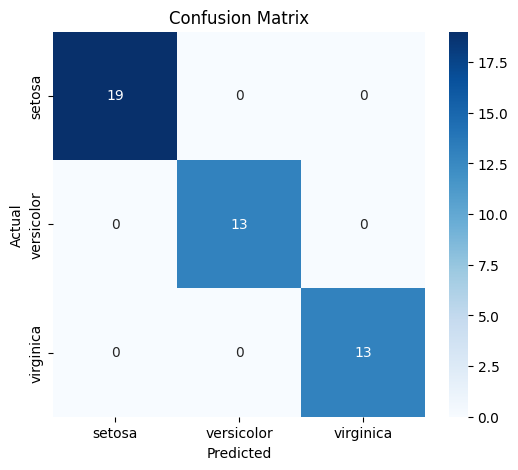

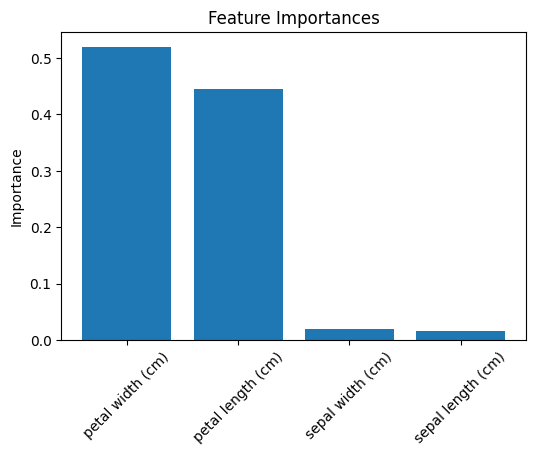

In [2]:
# Step 1: Import Libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 2: Load Dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Initialize Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=100,       # number of trees
    criterion='gini',       # split criterion ('gini' or 'entropy')
    max_depth=None,         # no limit on depth
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=100,
    bootstrap=True,
    random_state=42,
    oob_score=True          # enable Out-of-Bag evaluation
)

# Step 5: Train the model
rf.fit(X_train, y_train)

# Step 6: Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Step 7: Evaluate Performance
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("OOB Score:", rf.oob_score_)

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6,4))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.ylabel("Importance")
plt.show()
